In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os
import urllib
dataset = 'mnist.pkl.gz'
def reporthook(a,b,c):
    print "\rdownloading: %5.1f%%"%(a*b*100.0/c),
    
if not os.path.isfile(dataset):
        origin = "https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz"
        print('Downloading data from %s' % origin)
        urllib.urlretrieve(origin, dataset, reporthook=reporthook)
        

downloading: 100.0%


In [3]:
import gzip
import pickle
with gzip.open(dataset, 'rb') as f:
            train_set, valid_set, test_set = pickle.load(f)

In [4]:
print "train_set", train_set[0].shape, train_set[1].shape
print "valid_set", valid_set[0].shape, valid_set[1].shape
print "test_set", test_set[0].shape, test_set[1].shape

train_set (50000L, 784L) (50000L,)
valid_set (10000L, 784L) (10000L,)
test_set (10000L, 784L) (10000L,)


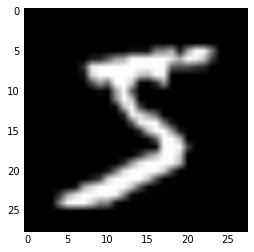

In [5]:
imshow(train_set[0][0].reshape((28, 28)), cmap="gray")


5
0
4
1
9


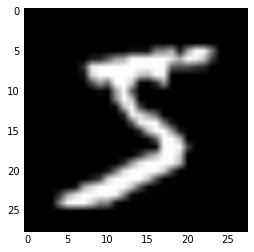

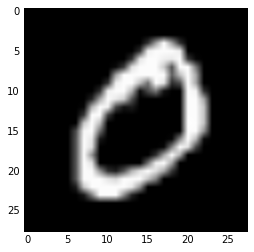

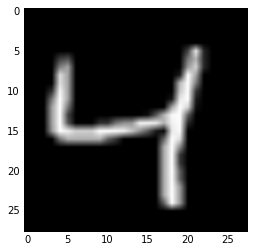

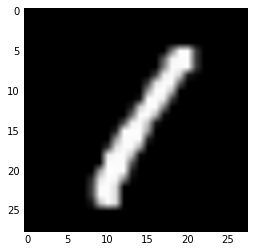

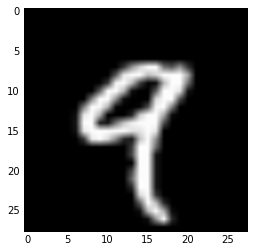

In [6]:

def show(x, i=[0]):
    plt.figure(i[0])
    imshow(x.reshape((28,28)), cmap="gray")
    i[0]+=1
for i in range(5):
    print train_set[1][i]
    show(train_set[0][i])

In [40]:
W = np.random.uniform(low=-1, high=1, size=(28*28,10))
b = np.random.uniform(low=-1, high=1, size=10)

In [41]:

x = train_set[0][0]
y = train_set[1][0]

In [42]:
Pr = exp(dot(x, W)+b)
Pr.shape

(10L,)

In [43]:
Pr = Pr/Pr.sum()
print Pr

[  9.35912600e-01   2.12622970e-04   1.76193971e-09   4.72250389e-05
   6.35578460e-02   4.67846290e-08   2.89393565e-05   1.64131920e-04
   7.09253750e-05   5.66107579e-06]


In [35]:
loss = -log(Pr[y])
loss

3.0831959729693916

In [13]:
gradb = Pr.copy()
gradb[y] -= 1
print gradb

[  6.21700306e-03   3.40624208e-01   3.38477034e-04   8.70858994e-03
   7.12399626e-03  -9.24258586e-01   4.73725278e-01   8.62008414e-02
   1.68493942e-04   1.15169896e-03]


In [14]:
print Pr.shape, x.shape, W.shape
gradW = dot(x.reshape(784,1), Pr.reshape(1,10), )
gradW[:, y] -= x

(10L,) (784L,) (784L, 10L)


In [15]:
W -= 0.1 * gradW
b -= 0.1 * gradb

In [16]:

Pr = exp(dot(x, W)+b)
Pr = Pr/Pr.sum()
loss = -log(Pr[y])
loss

0.00022855514569166248

In [17]:
W = np.random.uniform(low=-1, high=1, size=(28*28,10))
b = np.random.uniform(low=-1, high=1, size=10)
score = 0
N=50000*20
d = 0.001
learning_rate = 1e-2
for i in xrange(N):
    if i%50000==0:
        print i, "%5.3f%%"%(score*100)
    x = train_set[0][i%50000]
    y = train_set[1][i%50000]
    Pr = exp(dot(x, W)+b)
    Pr = Pr/Pr.sum()
    loss = -log(Pr[y])
    score *=(1-d)
    if Pr.argmax() == y:
        score += d
    gradb = Pr.copy()
    gradb[y] -= 1
    gradW = dot(x.reshape(784,1), Pr.reshape(1,10), )
    gradW[:, y] -= x
    W -= learning_rate * gradW
    b -= learning_rate * gradb

0 0.000%
50000 87.554%
100000 88.707%
150000 89.710%
200000 90.260%
250000 90.236%
300000 90.411%
350000 90.337%
400000 90.686%
450000 90.742%
500000 90.922%
550000 91.222%
600000 91.242%
650000 91.334%
700000 91.373%
750000 91.617%
800000 91.634%
850000 91.564%
900000 91.642%
950000 91.885%


In [20]:

def compute_Pr(x):
    Pr = exp(dot(x, W)+b)
    return Pr/Pr.sum(axis=1, keepdims=True)
def compute_accuracy(Pr, y):
    return mean(Pr.argmax(axis=1)==y)

In [19]:
W = np.random.uniform(low=-1, high=1, size=(28*28,10))
b = np.random.uniform(low=-1, high=1, size=10)
score = 0
N=50000*100
batch_size = 500
learning_rate = .7
for i in xrange(0, N, batch_size):
    if i%100000==0:
        x, y  = test_set[0], test_set[1]
        test_score = compute_accuracy(compute_Pr(x), y)*100
        x, y = valid_set[0], valid_set[1]
        valid_score = compute_accuracy(compute_Pr(x), y)*100
        print i, "%5.2f%%"%test_score, "%5.2f%%"%valid_score
    # 隨機選出一些訓練資料出來
    rndidx = np.random.choice(train_set[0].shape[0], batch_size, replace=False)
    x, y  = train_set[0][rndidx], train_set[1][rndidx]
    # 一次計算所有的 Pr
    Pr = compute_Pr(x)
    # 計算平均 gradient 
    gradb = Pr.mean(axis=0)-[(y==i).mean() for i in range(10)]
    gradW = dot(x.T, Pr)
    for i in range(batch_size):
        gradW[:, y[i]]-=x[i]
    gradW /= batch_size
    # 更新 W 和 b
    W -= learning_rate * gradW
    b -= learning_rate * gradb

0 12.36% 12.29%
100000 86.55% 86.45%
200000 89.13% 89.04%
300000 89.44% 89.46%
400000 90.18% 90.23%
500000 90.61% 90.68%
600000 90.71% 90.95%
700000 91.08% 91.02%
800000 91.17% 91.34%
900000 91.26% 91.53%
1000000 91.27% 91.53%
1100000 91.48% 91.56%
1200000 91.48% 91.78%
1300000 91.41% 91.83%
1400000 91.54% 91.98%
1500000 91.45% 91.83%
1600000 91.64% 91.88%
1700000 91.51% 91.88%
1800000 91.72% 92.08%
1900000 91.56% 92.16%
2000000 91.76% 91.94%
2100000 91.93% 92.16%
2200000 91.86% 92.35%
2300000 92.10% 92.31%
2400000 91.97% 92.39%
2500000 91.95% 92.22%
2600000 92.03% 92.28%
2700000 92.20% 92.39%
2800000 91.94% 92.33%
2900000 92.10% 92.29%
3000000 92.01% 92.42%
3100000 91.97% 92.43%
3200000 92.03% 92.43%
3300000 91.91% 92.58%
3400000 92.16% 92.50%
3500000 92.12% 92.36%
3600000 91.98% 92.43%
3700000 92.06% 92.38%
3800000 92.02% 92.50%
3900000 92.13% 92.56%
4000000 91.99% 92.41%
4100000 92.10% 92.42%
4200000 92.29% 92.53%
4300000 92.31% 92.45%
4400000 92.21% 92.47%
4500000 92.19% 92.50%
460

In [44]:
x, y  = test_set[0], test_set[1]
Pr = compute_Pr(x)
test_score = compute_accuracy(Pr, y)*100
x, y = valid_set[0], valid_set[1]
Pr = compute_Pr(x)
valid_score = compute_accuracy(Pr, y)*100
print "test accuracy %5.2f%%"%test_score, "valid accuracy %5.2f%%"%valid_score
x, y = train_set[0], train_set[1]
Pr = compute_Pr(x)
train_score = compute_accuracy(Pr, y)*100
print "train accuracy %5.2f%%"%train_score

test accuracy  9.18% valid accuracy  9.04%
train accuracy  9.56%


[0 4 1 4 3 6 1 6 6 4]
[7 2 1 0 4 1 4 9 5 9]


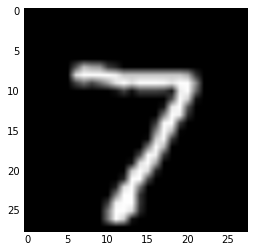

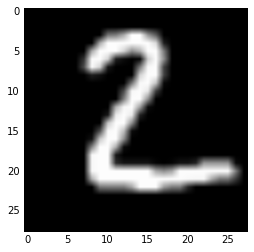

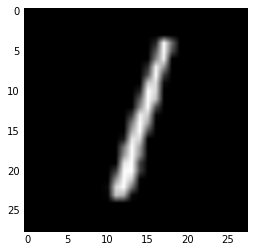

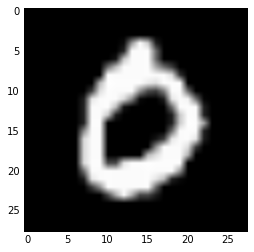

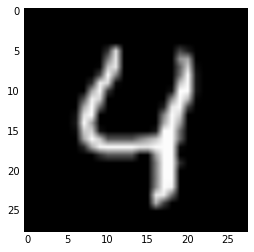

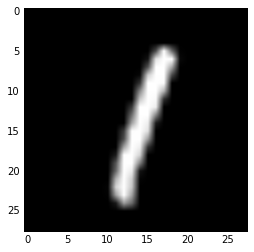

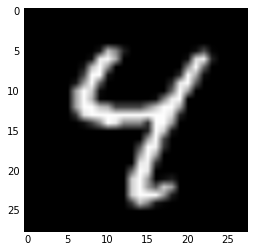

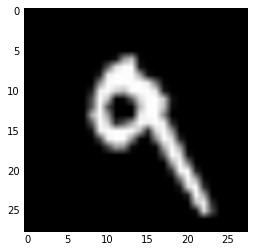

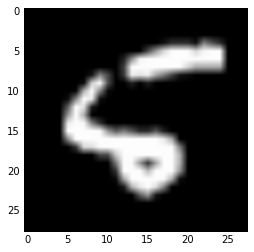

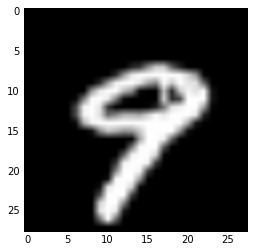

In [45]:
x = test_set[0][:10]
y = test_set[1][:10]
Pr = compute_Pr(x)
print Pr.argmax(axis=1)
print y
for i in range(10):
    show(x[i])

0 7
4 2
4 0
3 4
6 1
1 4
6 9
6 5
4 9
7 0
4 6
6 9
4 0
4 1
4 5
1 9
4 7
4 3
1 4
4 9
1 6
4 6
1 5


C:\Anaconda2\lib\site-packages\matplotlib\pyplot.py:516: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


3 4
9 7
2 4
4 0
6 1
4 3
9 1
6 3
6 4
0 7
0 2
4 7
0 2
5 1
4 1
4 7
1 4
0 2
4 3
2 5
9 1
1 2
1 4
1 6
4 3
0 5
2 5
0 6
6 0
0 4
5 1
4 9
9 5
9 7
1 8
6 9
1 3
1 7
0 4
0 6
3 4
1 3
6 7
7 0
0 2
3 9
6 1
6 7
0 3
9 2
6 9
4 7
3 7
1 6
0 2
9 7
6 8
1 4
4 7
4 3
0 6
9 3
1 6
3 9
1 3
6 1
6 4
9 1
6 7
1 6
4 9


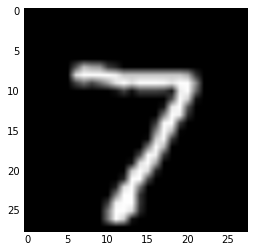

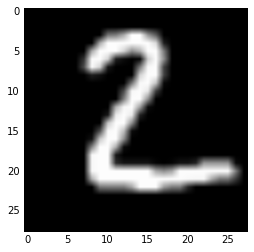

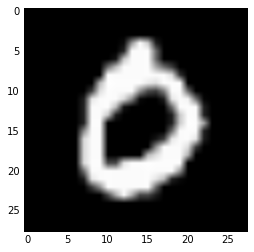

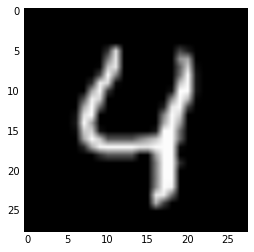

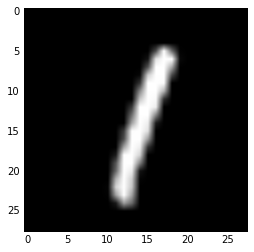

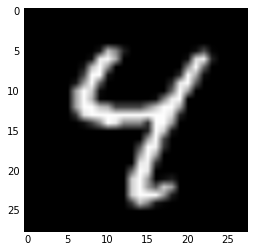

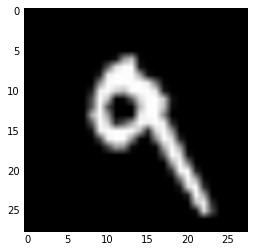

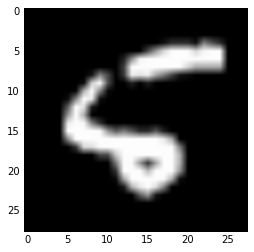

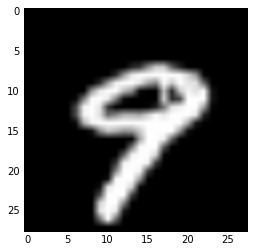

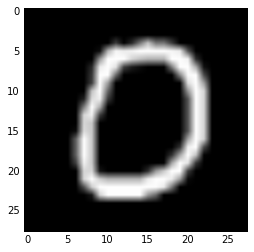

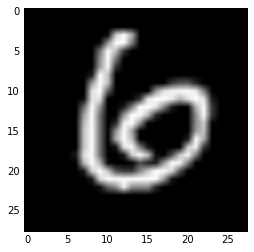

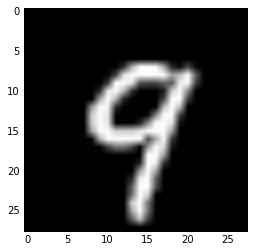

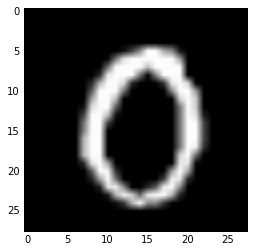

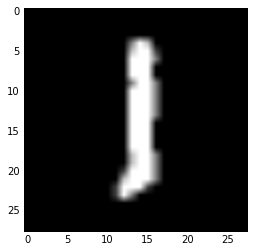

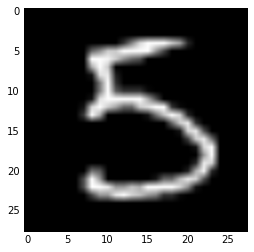

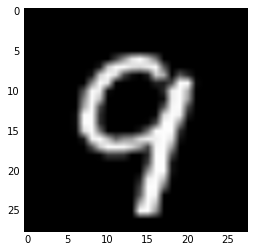

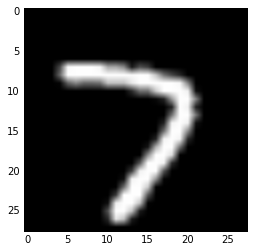

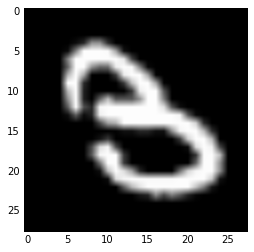

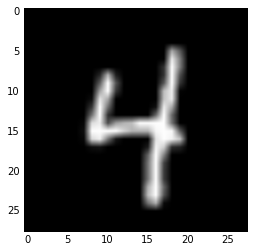

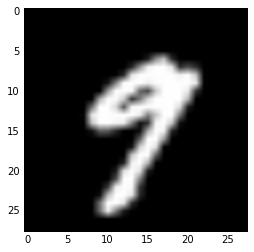

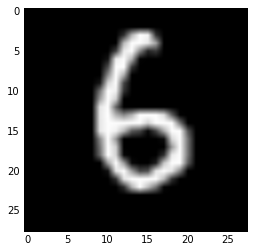

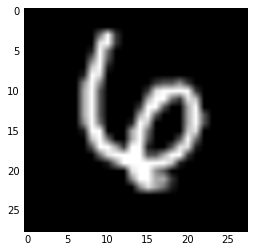

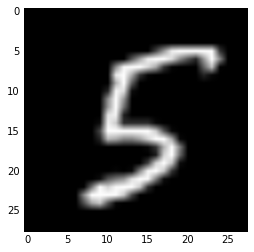

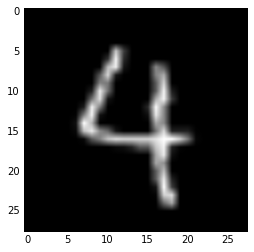

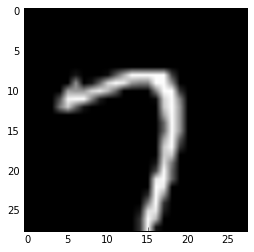

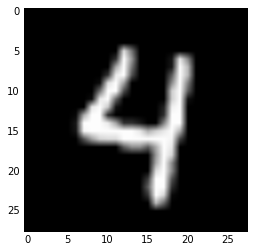

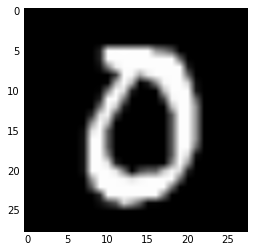

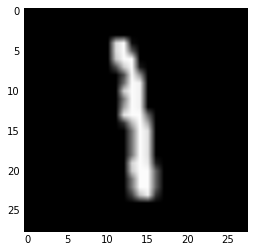

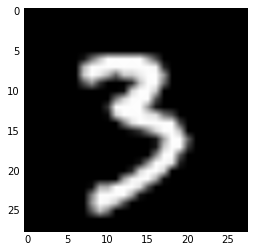

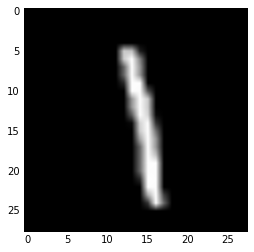

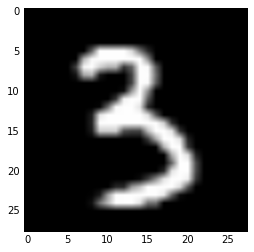

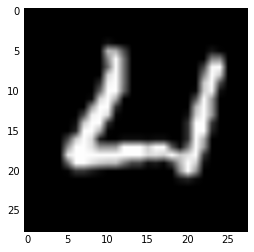

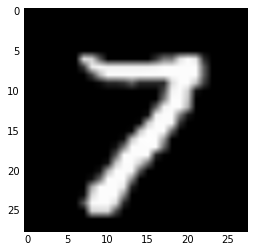

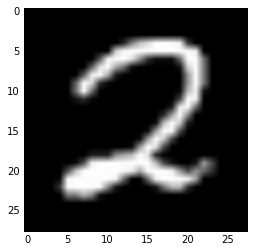

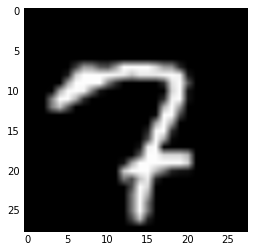

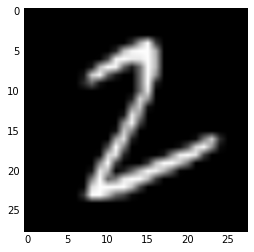

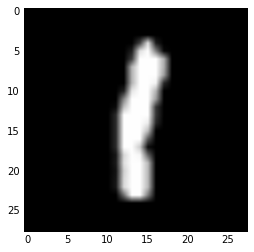

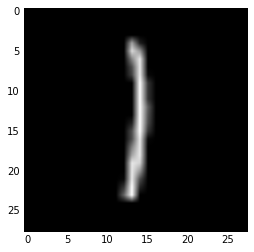

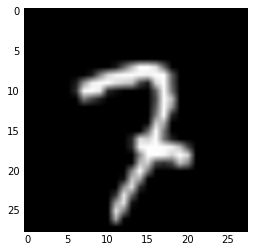

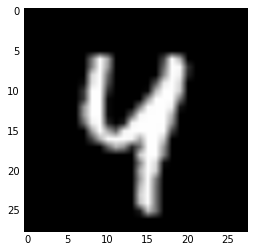

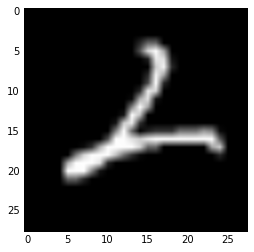

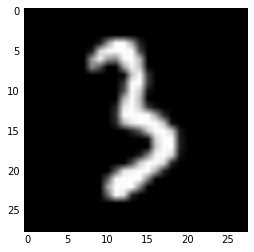

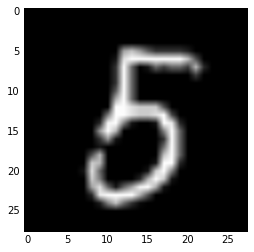

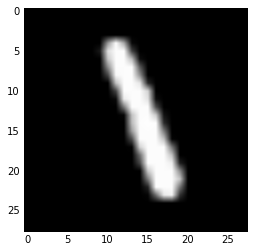

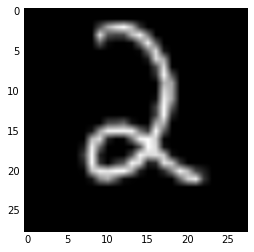

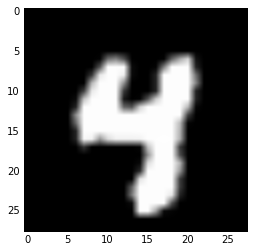

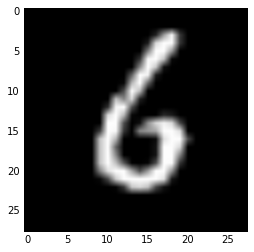

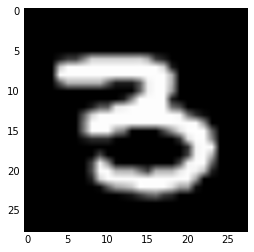

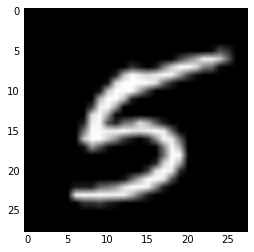

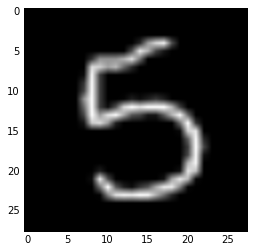

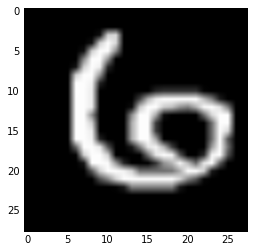

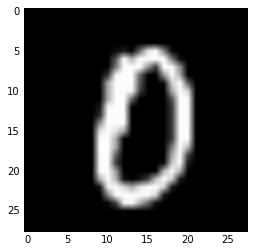

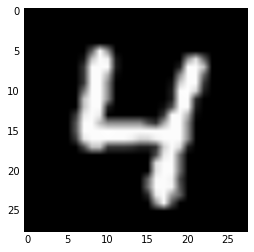

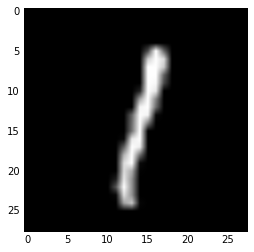

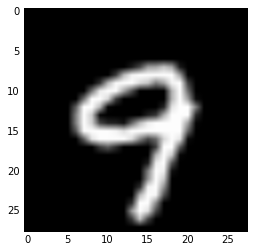

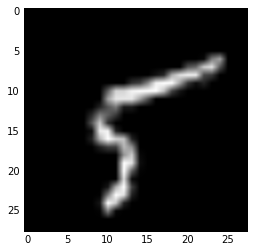

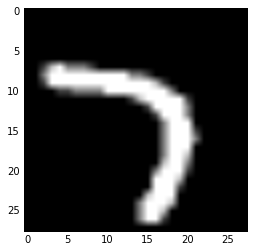

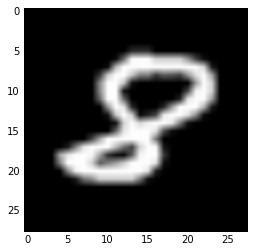

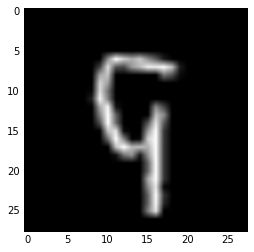

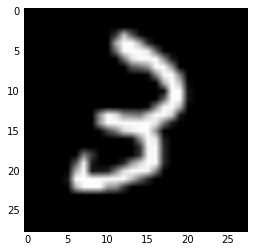

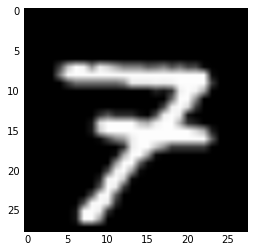

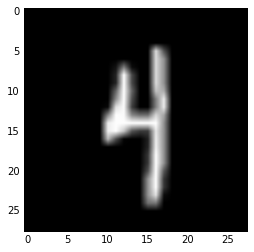

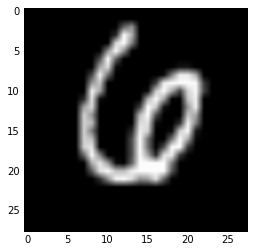

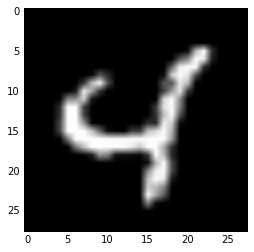

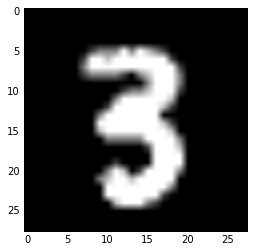

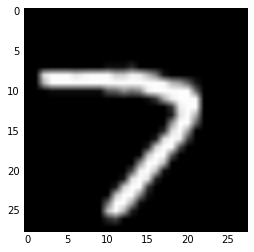

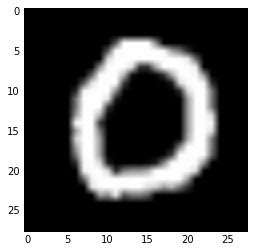

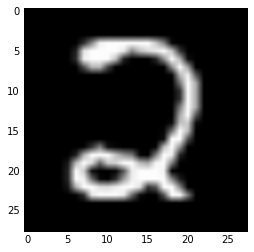

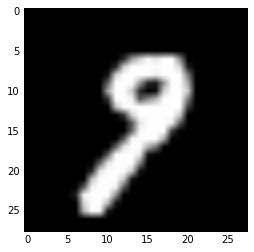

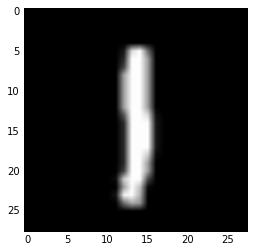

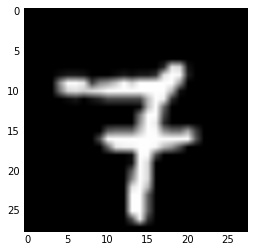

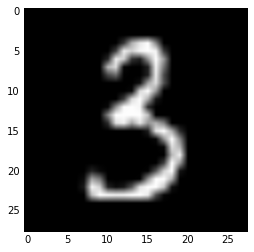

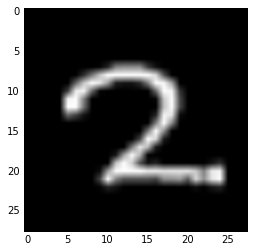

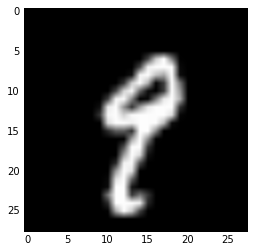

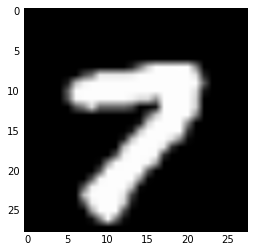

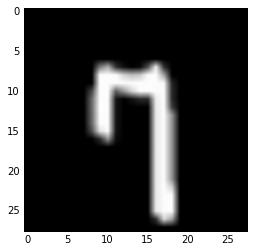

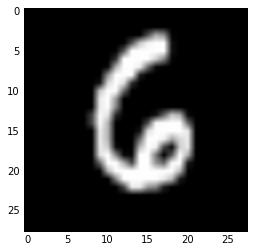

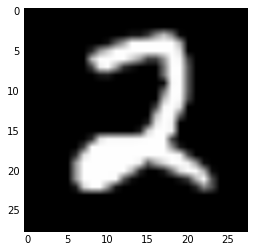

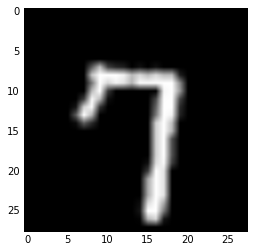

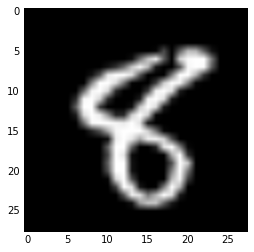

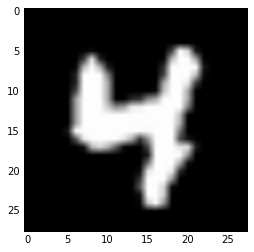

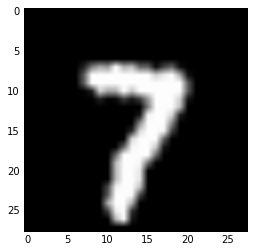

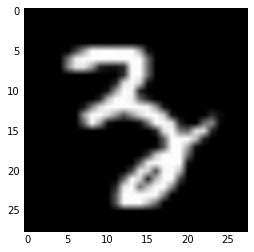

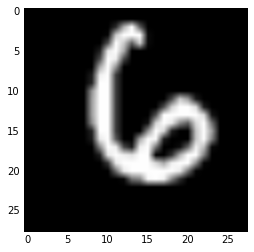

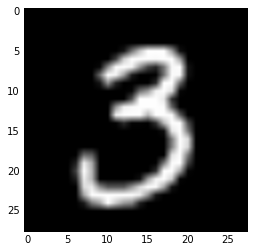

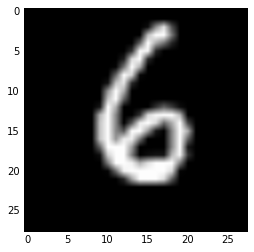

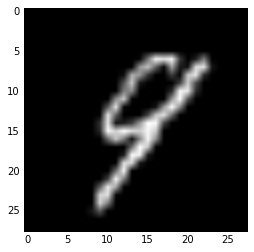

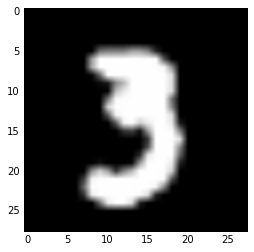

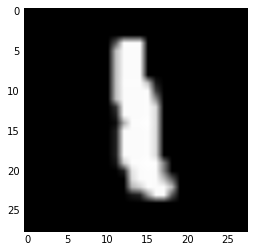

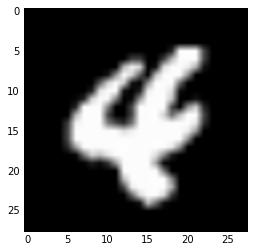

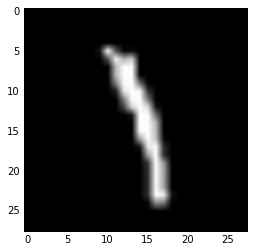

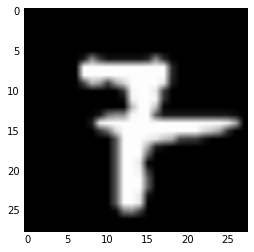

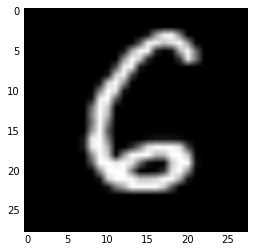

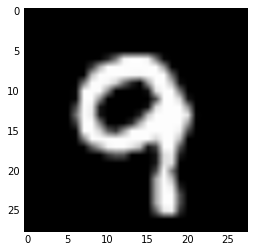

In [46]:
x = test_set[0][:100]
y = test_set[1][:100]
Pr = compute_Pr(x)
y2 = Pr.argmax(axis=1)
for i in range(100):
    if y2[i] != y[i]:
        print y2[i], y[i]
        show(x[i])